## Visualization of all training runs

In [35]:
# find files recursively
from glob import glob

# parse tb files
from tbparse import SummaryReader

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# searching df rows with np.where()
import numpy as np
import pandas as pd

import re

In [36]:
# recursively read tensorboard files
tb_files = []
# for filename in glob('**/events.out.tfevents.*', recursive=True):
#     tb_files.append(filename)
for filename in glob('training/spiderenv_training/**/*reward_sum*', recursive=True):
    tb_files.append(filename)
for filename in glob('**/seqdqn*', recursive = True):
    tb_files.append(filename)
for filename in glob('**/sac_3*', recursive = True):
    tb_files.append(filename)

tb_files = [file for file in tb_files if not "eudist" in file and not "seqdqn_3_spider_2" in file]
# print([file for file in tb_files if not "eudist" in file])

# tb_files = [re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "", file)) for file in tb_files if not "eudist" in file]
tb_files

['training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/dqn_3_spider_2/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/dqn_3_spider_2/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/dqn_3_spider_2/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent1',
 'training/spiderenv_training/seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent2',
 'training/spiderenv_training/dqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent0',
 'training/spiderenv_training/dqn_3_spider_1/tensorboard_logs/rollout_reward_sum_a

In [37]:
readers = [SummaryReader(file, pivot = True) for file in tb_files]

In [38]:
# reader = SummaryReader(tb_files, pivot = True, extra_columns = {'dir_name'})
# reader = SummaryReader(".", pivot = True, extra_columns = {'dir_name'})
# df = reader.scalars
# df

# pd.set_option('display.max_rows', 500)
dfs = []
for reader in readers:
    temp_df = reader.scalars
    if "sac_3_spider" in reader.log_path:
        temp_df.rename(columns={"reward/reward_sum":"rollout/reward_sum"}, inplace=True)
    temp_df = temp_df[["step", "rollout/reward_sum"]] 
    print(re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "",  reader.log_path)))
    temp_df.insert(2, "dir_name", np.repeat(re.sub("training/spiderenv_training/", "", re.sub("_\d(/tensorboard_logs/rollout_reward_sum_agent\d)?", "",  reader.log_path)), len(reader.scalars.index)))
    print("succes")
    # temp_df.insert(2, "dir_name", np.repeat(reader.log_path.replace("/tensorboard_logs/rollout_reward_sum_agent*", ""), len(reader.scalars.index)))
    temp_df["step"] = temp_df.index
    if "seqsac" in reader.log_path:
        temp_df['rollout/reward_sum'] = temp_df['rollout/reward_sum'].apply(np.mean)
    temp_df["avg_reward_sum"] = temp_df["rollout/reward_sum"].rolling(window = 25, step = 25).mean()
    temp_df = temp_df[temp_df.step > 25]
    # temp_df = temp_df[["step", "rollout/reward_sum", "dir_name", "avg_reward_sum"]]
    temp_df.dropna()
    dfs.append(temp_df)
print("all success")

seqsac_spider
succes
seqsac_spider
succes
seqsac_spider
succes
dqn_spider
succes
dqn_spider
succes
dqn_spider
succes
seqsac_spider
succes
seqsac_spider
succes
seqsac_spider
succes
dqn_spider
succes
dqn_spider
succes
dqn_spider
succes
seqsac_spider
succes
seqsac_spider
succes
seqsac_spider
succes
seqsac_spider
succes
seqsac_spider
succes
seqsac_spider
succes
seqdqn_spider
succes
sac_spider
succes
sac_spider
succes
all success


In [39]:
df = pd.concat(dfs)
df = df[df['avg_reward_sum'].notna()]
df

,step,rollout/reward_sum,dir_name,avg_reward_sum
50,50,-0.050000,seqsac_spider,0.492560
75,75,0.925000,seqsac_spider,0.219480
100,100,-0.062000,seqsac_spider,0.377960
125,125,-0.040000,seqsac_spider,0.374600
150,150,-0.050000,seqsac_spider,0.303960
...,...,...,...,...
71175,71175,30.976999,sac_spider,24.013267
71200,71200,-0.033333,sac_spider,26.013293
71225,71225,24.966999,sac_spider,24.494067
71250,71250,25.971333,sac_spider,23.934280


In [40]:
display(df["dir_name"].unique())

array(['seqsac_spider', 'dqn_spider', 'seqdqn_spider', 'sac_spider'],
      dtype=object)

In [41]:
df2 = df.loc[(df.index>0)&(df.index<20000)]

/tmp/ipykernel_28558/2317357487.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3 = df2[df["dir_name"].str.contains("dqn")]


IndexError: indices are out-of-bounds

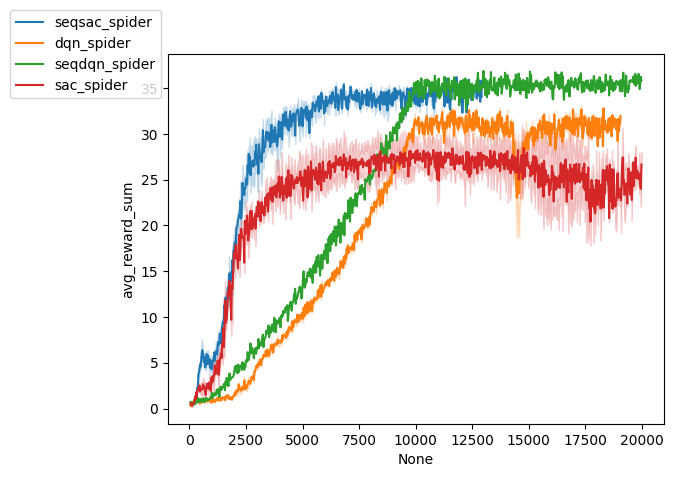

<Figure size 640x480 with 0 Axes>

In [45]:
sns.lineplot(data = df2, x = df2.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

plt.figure()
df3 = df2[df2["dir_name"].str.contains("dqn")]
sns.lineplot(data = df3, x = df3.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)

plt.figure()
df4 = df2[df2["dir_name"].str.contains("sac")]
sns.lineplot(data = df4, x = df4.index, y = "avg_reward_sum", hue = "dir_name")
# sns.lineplot(data = df, x = df.index, y = "rollout/reward_sum", hue = "dir_name")
# plt.legend([],[], frameon = False)
# sns.lineplot(data = df, x = "step", y = "rollout/reward_sum", hue = "dir_name")
# sns.lineplot(data = df[df["dir_name"].str.contains("custom")], x = "step", y = "rollout/reward_sum", hue = "dir_name")
plt.legend(bbox_to_anchor = (0, 1), loc = 'center right', ncol = 1)


['seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent0',
 'seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent1',
 'seqsac_3_spider_2/tensorboard_logs/rollout_reward_sum_agent2',
 'dqn_3_spider_2/tensorboard_logs/rollout_reward_sum_agent0',
 'dqn_3_spider_2/tensorboard_logs/rollout_reward_sum_agent1',
 'dqn_3_spider_2/tensorboard_logs/rollout_reward_sum_agent2',
 None,
 None,
 None,
 'seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent0',
 'seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent1',
 'seqsac_3_spider_4/tensorboard_logs/rollout_reward_sum_agent2',
 None,
 None,
 None,
 'dqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent0',
 'dqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent1',
 'dqn_3_spider_1/tensorboard_logs/rollout_reward_sum_agent2',
 'seqsac_3_spider_3/tensorboard_logs/rollout_reward_sum_agent0',
 'seqsac_3_spider_3/tensorboard_logs/rollout_reward_sum_agent1',
 'seqsac_3_spider_3/tensorboard_logs/rollout_reward_sum_agent2',
 

In [6]:
# # display(df[df["dir_name"].str.match("custom")])
# df = df.replace({"./tensorboard_logs.*": ""}, regex = True)
# for lr in ["lr1e-4", "lr3e-4", "lr5e-4"]:
#     # df["lr"] = np.where(df["dir_name"].str.contains(lr), float(lr[2:]))
#     df.loc[df["dir_name"].str.contains(lr), 'lr'] = float(lr[2:])
# for gamma in ["gamma99e-2"]:
#     df["gamma"] = np.where(df["dir_name"].str.contains(gamma), float(gamma[5:]), None)
# for tau in ["tau5e-3"]:
#     df["tau"] = np.where(df["dir_name"].str.contains(tau), float(tau[3:]), None)
    
# # display(df[df["dir_name"].str.contains("custom")])
# # display(df["rollout/ep_rew_mean"])
# df

In [5]:
display(df["dir_name"].unique())

array(['lr1e-4_tau5e-3_gamma99e-2/custom',
       'lr1e-4_tau5e-3_gamma99e-2/energy',
       'lr1e-4_tau5e-3_gamma99e-2/solarcomfort',
       'lr3e-4_tau5e-3_gamma99e-2/custom',
       'lr3e-4_tau5e-3_gamma99e-2/energy',
       'lr3e-4_tau5e-3_gamma99e-2/solarcomfort',
       'lr5e-4_tau5e-3_gamma99e-2/custom',
       'lr5e-4_tau5e-3_gamma99e-2/energy',
       'lr5e-4_tau5e-3_gamma99e-2/solarcomfort'], dtype=object)

In [6]:
def plot(df, group, title, doesnotcontain : str = False, xrange = False, yrange = False):
    # custom grouping hue for lr, gamma, tau
    hue = df[["lr", "gamma", "tau"]].apply(lambda row: f"{row.lr}, {row.gamma}, {row.tau}", axis=1)
    
    # plot
    sns.set_style()
    if doesnotcontain:
        ax = sns.lineplot(data = df[(df["dir_name"].str.contains(group)) & (df["dir_name"].str.contains(doesnotcontain) == False)], x = "step", y = "rollout/ep_rew_mean", hue = hue)        
    else:
        ax = sns.lineplot(data = df[df["dir_name"].str.contains(group)], x = "step", y = "rollout/ep_rew_mean", hue = hue)

    if xrange: ax.set_xlim(xrange)
    if yrange: ax.set_ylim(yrange)
    
    plt.legend(title='Config (lr, gamma, tau)', loc='lower right')
    plt.ylabel("Episode reward sum")
    plt.title(title)
    plt.show()

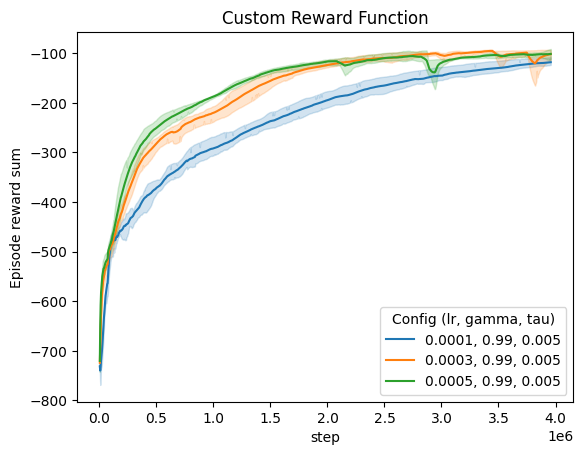

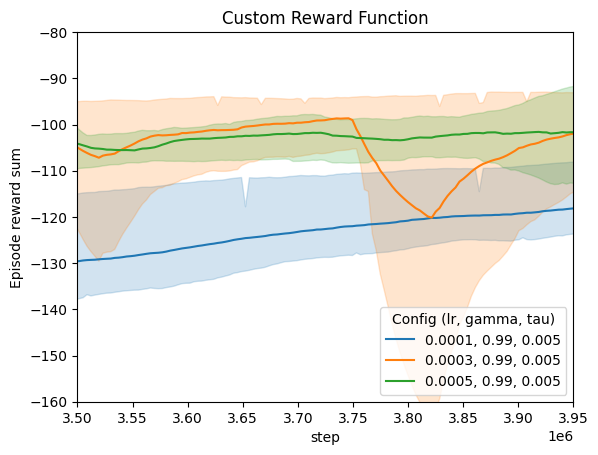

In [7]:
plot(df, "custom", "Custom Reward Function", "relaxed")
plot(df, "custom", "Custom Reward Function", "relaxed", xrange = [3500000, 3950000], yrange = [-160, -80])

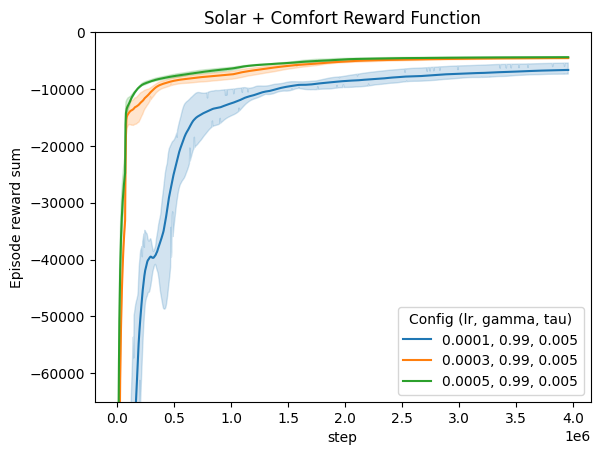

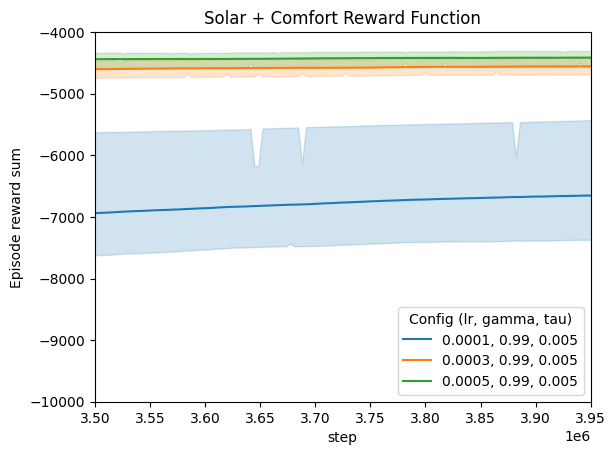

In [14]:
plot(df, "solarcomfort", "Solar + Comfort Reward Function", yrange = [-65000, 0])
plot(df, "solarcomfort", "Solar + Comfort Reward Function", xrange = [3500000, 3950000], yrange= [-10000, -4000])

In [12]:
# plot(df, "customrelaxed", "Relaxed Custom Reward Function")
# plot(df, "customrelaxed", "Relaxed Custom Reward Function", xrange = [3500000, 3950000], yrange = [-7000, 0])

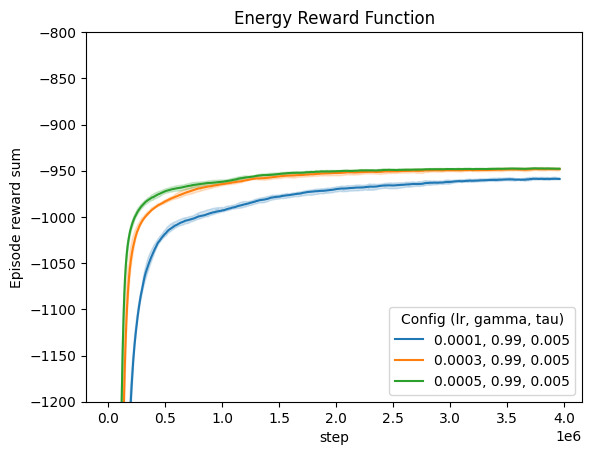

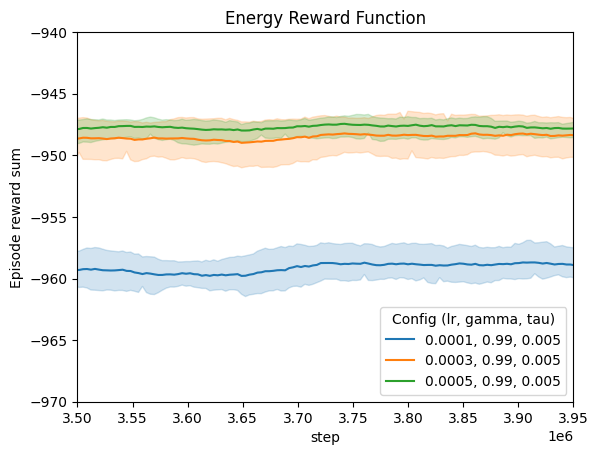

In [15]:
plot(df, "energy", "Energy Reward Function", yrange = [-1200, -800])
plot(df, "energy", "Energy Reward Function", xrange = [3500000, 3950000], yrange = [-970, -940])